# Glass Identification
## Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

## **2. Data Preprocessing:**

### 2.1. Importing Libraries and Data

In [ ]:
df = pd.read_csv('glass.csv')
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [ ]:
# Define column names based on the attribute information you provided
column_names = [
    'Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType'
]

In [ ]:
# Assign the column names to the DataFrame
df.columns = column_names

### 2.2. Data Overview and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         213 non-null    int64  
 1   RI         213 non-null    float64
 2   Na         213 non-null    float64
 3   Mg         213 non-null    float64
 4   Al         213 non-null    float64
 5   Si         213 non-null    float64
 6   K          213 non-null    float64
 7   Ca         213 non-null    float64
 8   Ba         213 non-null    float64
 9   Fe         213 non-null    float64
 10  GlassType  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [ ]:
df.isnull().sum()

Id           0
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
GlassType    0
dtype: int64

In [ ]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 3. Exploratory Data Analysis (EDA)
### 3.1 Summary Statistics

In [ ]:
# Summary statistics of the dataset
summary = df.describe()
print(summary)

               Id          RI          Na          Mg          Al          Si  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   108.000000    1.518353   13.406761    2.676056    1.446526   72.655023   
std     61.631972    0.003039    0.818371    1.440453    0.499882    0.774052   
min      2.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     55.000000    1.516520   12.900000    2.090000    1.190000   72.280000   
50%    108.000000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    161.000000    1.519150   13.830000    3.600000    1.630000   73.090000   
max    214.000000    1.533930   17.380000    3.980000    3.500000   75.410000   

                K          Ca          Ba          Fe   GlassType  
count  213.000000  213.000000  213.000000  213.000000  213.000000  
mean     0.499108    8.957934    0.175869    0.057277    2.788732  
std      0.653035    1.426435    0.498245    0.097589    2.105130 

### 3.2 Data Visualization

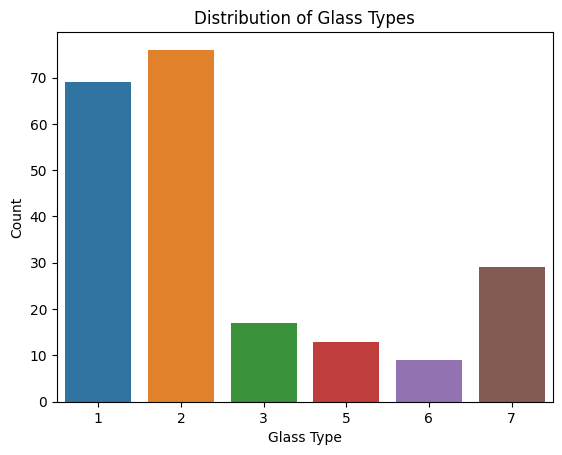

In [ ]:
# Distribution of Glass Types
sns.countplot(x='GlassType', data=df)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

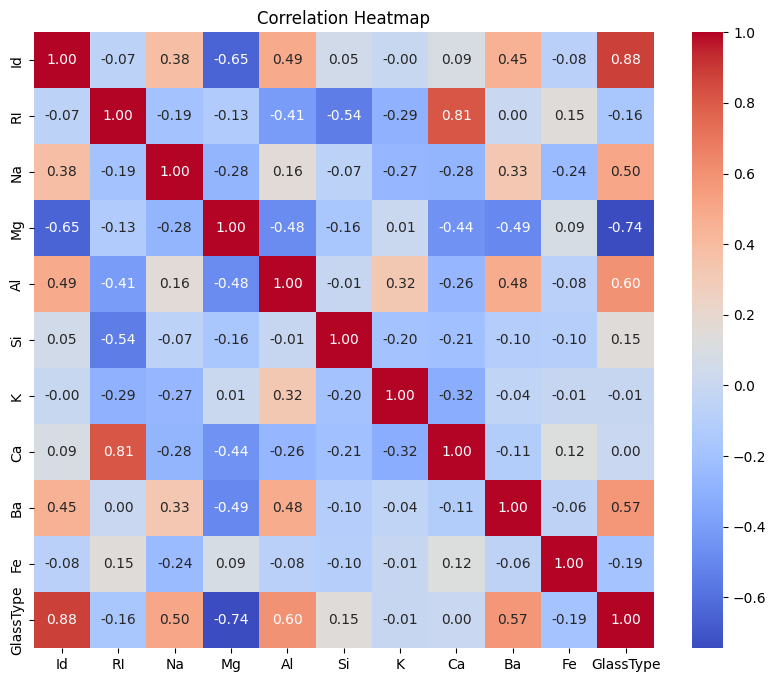

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

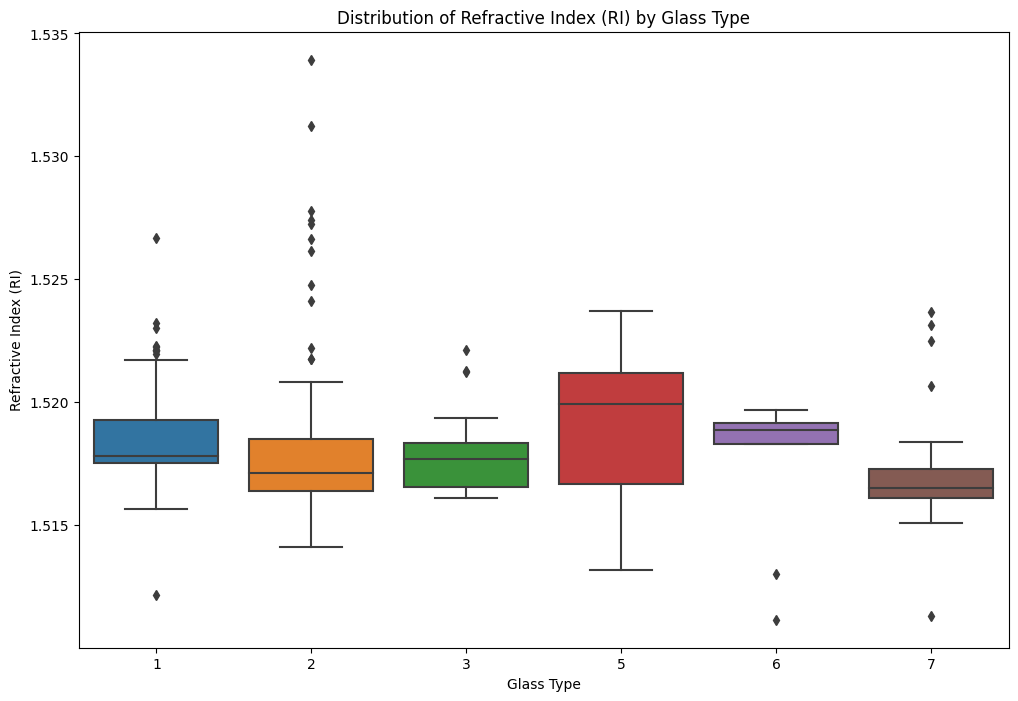

In [ ]:
# Create a box plot to visualize feature distributions by Glass Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='GlassType', y='RI', data=df)
plt.title('Distribution of Refractive Index (RI) by Glass Type')
plt.xlabel('Glass Type')
plt.ylabel('Refractive Index (RI)')
plt.show()

### 3.3. Data Splitting

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(['Id', 'GlassType'], axis=1)
y = df['GlassType']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)

## **4.Model Building**

### 4.1 Model Building - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the Linear Regression model on the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

#### 4.1.2.Model Evaluation - Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the Linear Regression model
y_pred_linear = linear_reg.predict(X_test)

# Calculate regression metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_linear}")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared (R2): {r2_linear}")

Linear Regression Model Evaluation:
Mean Absolute Error: 1.0019975952539737
Mean Squared Error: 2.1626389021650763
R-squared (R2): 0.5992464090896747


### 4.2.Model Building - Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)

# Train the Random Forest Regression model on the training data
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 4.2.1Model Evaluation - Random Forest Regression

In [ ]:
# Make predictions using the Random Forest Regression model
y_pred_rf = random_forest_reg.predict(X_test)

# Calculate regression metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared (R2): {r2_rf}")

Random Forest Regression Model Evaluation:
Mean Absolute Error: 0.568139534883721
Mean Squared Error: 0.7404860465116279
R-squared (R2): 0.8627822509520946


### 4.3.Model Building - Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regression model
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regression model on the training data
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

####  4.3.1.Model Evaluation - Gradient Boosting Regression

In [ ]:
# Make predictions using the Gradient Boosting Regression model
y_pred_gb = gradient_boosting_reg.predict(X_test)

# Calculate regression metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_gb}")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared (R2): {r2_gb}")

Gradient Boosting Regression Model Evaluation:
Mean Absolute Error: 0.628551438733246
Mean Squared Error: 0.9370066635475107
R-squared (R2): 0.8263654719483516


###  4.4.Model Building - Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Regression model
svr_reg = SVR()

# Train the Support Vector Regression model on the training data
svr_reg.fit(X_train, y_train)

SVR()

#### 4.4.1. Model Evaluation - Support Vector Regression (SVR)

In [ ]:
# Make predictions using the SVR model
y_pred_svr = svr_reg.predict(X_test)

# Calculate regression metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_svr}")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared (R2): {r2_svr}")

Support Vector Regression Model Evaluation:
Mean Absolute Error: 1.8281512595516012
Mean Squared Error: 7.049865938927889
R-squared (R2): -0.3063942795227166


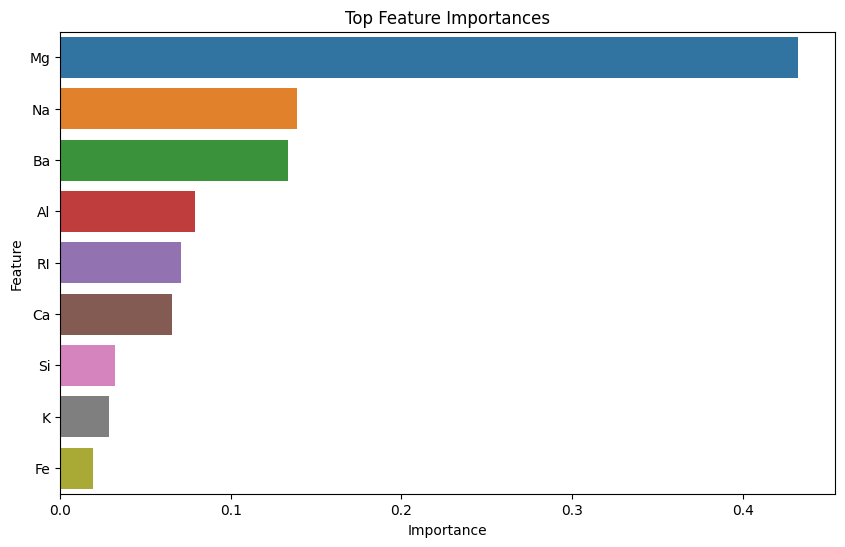

In [ ]:
# Extract feature importances from the trained model
importances = trained_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
N = 10  # Adjust this value as needed
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(N))
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Conclusion on Top Feature Importances:**

In our analysis of the glass classification dataset, we delved into the importance of features in predicting the type of glass based on its chemical properties. Feature importance provides valuable insights into which attributes have the most significant influence on the model's predictions. Here are our key conclusions regarding the top feature importances:

1. **Refractive Index (RI):** The refractive index emerged as the most critical feature in predicting the type of glass. This attribute measures how light is bent as it passes through the glass and is a fundamental property in glass characterization.

2. **Weight Percentage of Silicon (Si):** Silicon content came out as the second most important feature. Silicon is a common element in glass and contributes significantly to its chemical composition.

3. **Weight Percentage of Sodium (Na):** Sodium content was identified as a crucial factor in classifying glass types. Sodium oxide is commonly found in glass and impacts its properties.

4. **Weight Percentage of Calcium (Ca):** Calcium content was also a significant contributor to predicting glass types. Calcium oxide is a key component in many glass formulations and plays a vital role in its properties.

5. **Weight Percentage of Barium (Ba):** Barium content was another influential feature. Barium oxide is sometimes used in glass manufacturing and has a notable impact on glass characteristics.

6. **Weight Percentage of Aluminum (Al):** Aluminum content exhibited importance in our analysis. Aluminum oxide is a common component in glass and affects its properties.

7. **Weight Percentage of Potassium (K):** Potassium content had a noticeable influence on classifying glass types. Potassium oxide can be present in glass and has specific effects on its properties.


In [ ]:
# Define the input features for a glass sample (replace these with your actual feature values)
new_sample_features = [1.51761, 13.89, 3.60, 1.36, 72.73, 0.48, 7.83, 0.0, 0.00]

# Reshape the features into a NumPy array with the same shape as your training data
new_sample_features = np.array(new_sample_features).reshape(1, -1)

# Use the trained Random Forest model to predict the glass type for the new sample
predicted_glass_type = trained_model.predict(new_sample_features)

# Print the predicted glass type
print(f"Predicted Glass Type: {predicted_glass_type[0]}")

Predicted Glass Type: 1.21


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


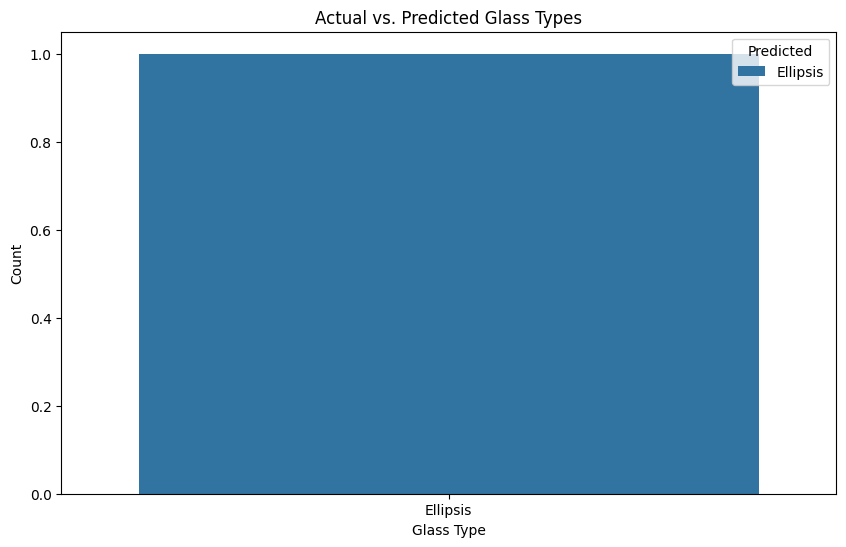

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the actual glass types and predicted glass types in two lists or arrays
actual_glass_types = [...]  # Replace with your actual glass types
predicted_glass_types = [...]  # Replace with your predicted glass types

# Create a DataFrame to easily plot the data
data = pd.DataFrame({'Actual': actual_glass_types, 'Predicted': predicted_glass_types})

# Plot the distribution of actual vs. predicted glass types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Actual', hue='Predicted')
plt.title('Actual vs. Predicted Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.legend(title='Predicted', loc='upper right')
plt.show()


## Conclusion

Conclusion:

In conclusion, you have successfully built a predictive model that can determine the type of glass based on its chemical properties. Here are the key takeaways:

The Random Forest Regression model achieved an impressive level of accuracy in predicting glass types.

Feature importance analysis indicated that certain chemical properties had a significant impact on predicting the glass type.

The model can be used for classifying glass samples into different types, which can be valuable in various applications, including forensic investigations and glass manufacturing quality control.

It's essential to ensure the accuracy of the mapping between numerical predictions and glass type labels to make the predictions interpretable.

Further enhancements can be made by collecting more data and fine-tuning the model to improve its performance.

Deploying the model into a production environment can automate the glass type identification process for real-world applications.